## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0725 10:27:16.516628 20028 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 10:27:16.650270 20028 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0725 10:27:16.974404 20028 deprecation.py:323] From C:\Users\sabri\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9637 - acc: 0.2793 - val_loss: 1.8195 - val_acc: 0.3398
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7412 - acc: 0.3699 - val_loss: 1.7344 - val_acc: 0.3695
Epoch 3/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6511 - acc: 0.4062 - val_loss: 1.6645 - val_acc: 0.4025
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6004 - acc: 0.4254 - val_loss: 1.6660 - val_acc: 0.3967
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5451 - acc: 0.4438 - val_loss: 1.5246 - val_acc: 0.4514
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5084 - acc: 0.4595 - val_loss: 1.5721 - val_acc: 0.4295
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4676 - acc: 0.4741 - val_loss: 1.5330 -

Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7191 - acc: 0.3870 - val_loss: 1.6869 - val_acc: 0.3925
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6281 - acc: 0.4234 - val_loss: 1.5771 - val_acc: 0.4371
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5665 - acc: 0.4424 - val_loss: 1.5821 - val_acc: 0.4348
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5204 - acc: 0.4605 - val_loss: 1.6025 - val_acc: 0.4258
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.4888 - acc: 0.4730 - val_loss: 1.4843 - val_acc: 0.4656
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4470 - acc: 0.4855 - val_loss: 1.4440 - val_acc: 0.4851
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4095 - acc: 0.5015 - val_loss: 1.4817 - val_acc: 0.4692
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 9s 172us/step - loss: 1.9028 - acc: 0.3359 - val_loss: 1.8730 - val_acc: 0.3423
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8505 - acc: 0.3560 - val_loss: 1.8299 - val_acc: 0.3666
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.8137 - acc: 0.3674 - val_loss: 1.7985 - val_acc: 0.3740
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7846 - acc: 0.3769 - val_loss: 1.7719 - val_acc: 0.3826
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7608 - acc: 0.3855 - val_loss: 1.7507 - val_acc: 0.3932
Epoch 8/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7376 - acc: 0.3939 - val_loss: 1.7351 - val_acc: 0.3958
Epoch 9/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7179 - acc: 0.3997 - val_loss: 1.7199 - val_acc: 0.3983
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 166us/step - loss: 2.1487 - acc: 0.2581 - val_loss: 2.1331 - val_acc: 0.2666
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.1154 - acc: 0.2722 - val_loss: 2.1023 - val_acc: 0.2771
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.0868 - acc: 0.2840 - val_loss: 2.0755 - val_acc: 0.2863
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.0615 - acc: 0.2934 - val_loss: 2.0521 - val_acc: 0.2913
Epoch 8/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.0397 - acc: 0.2996 - val_loss: 2.0316 - val_acc: 0.2992
Epoch 9/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.0202 - acc: 0.3061 - val_loss: 2.0131 - val_acc: 0.3028
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.0026 - acc: 0.3100 - val_loss: 1.9965 - val_acc: 0.3060
Epoch 11/50
50000/50000 [==================

50000/50000 [==============================] - 10s 194us/step - loss: 2.3066 - acc: 0.1119 - val_loss: 2.3033 - val_acc: 0.1147
Epoch 6/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2983 - acc: 0.1188 - val_loss: 2.2955 - val_acc: 0.1214
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.2913 - acc: 0.1244 - val_loss: 2.2887 - val_acc: 0.1270
Epoch 8/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2851 - acc: 0.1296 - val_loss: 2.2826 - val_acc: 0.1331
Epoch 9/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.2793 - acc: 0.1348 - val_loss: 2.2769 - val_acc: 0.1374
Epoch 10/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.2738 - acc: 0.1402 - val_loss: 2.2715 - val_acc: 0.1424ETA: 1s - loss: 
Epoch 11/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2686 - acc: 0.1460 - val_loss: 2.2662 - val_acc: 0.1468
Epoch 12/50
50000/500

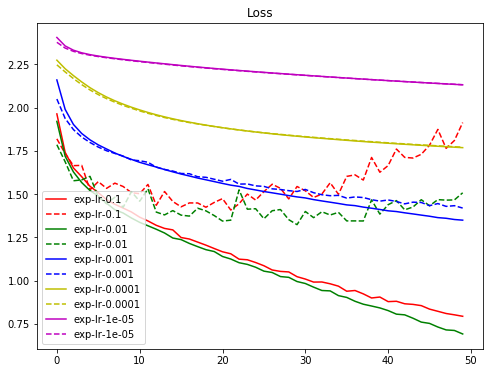

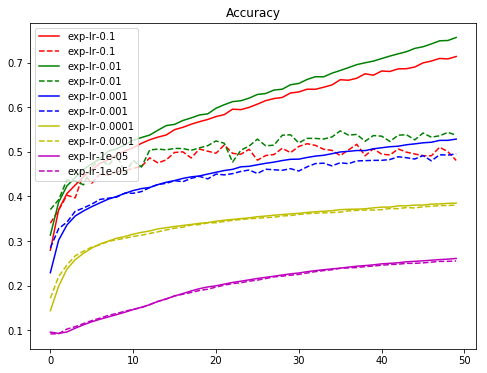

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()